In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

In [3]:
df_train = pd.read_csv('Weather Forecast Training.csv')

In [4]:
df_test = pd.read_csv('Weather Forecast Testing.csv')

In [5]:
df_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RainTomorrow
0,NorahHead,18.9,23.7,0.0,NaN,NaN,SSE,41.0,SSE,28.0,55.0,1026.0,NaN,22.4,No,Yes
1,Nuriootpa,11.1,20.8,0.0,4.8,8.3,W,39.0,WSW,26.0,48.0,1014.4,7.0,19.5,No,No
2,GoldCoast,15.9,19.5,17.6,NaN,NaN,SE,44.0,SW,9.0,99.0,1028.5,NaN,17.8,Yes,Yes
3,Bendigo,0.0,14.9,0.0,NaN,NaN,WSW,35.0,WNW,19.0,55.0,1023.0,4.0,14.2,No,Yes
4,Walpole,9.1,22.7,0.0,NaN,NaN,NNE,41.0,ESE,7.0,40.0,1027.1,NaN,22.5,No,No


In [6]:
df_test.head()

,ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday
0,1,Perth,15.3,21.5,4.4,2.4,1.4,NW,70.0,W,22.0,69.0,997.6,7.0,19.8,Yes
1,2,Portland,7.1,11.0,38.8,1.2,5.8,SSE,48.0,SW,19.0,46.0,1014.0,4.0,10.7,Yes
2,3,Hobart,3.6,16.6,0.2,2.8,9.3,NW,37.0,N,15.0,48.0,1016.6,5.0,15.4,No
3,4,Woomera,17.6,37.4,0.0,34.0,NaN,NNW,37.0,NW,19.0,11.0,1010.4,2.0,34.6,No
4,5,Townsville,11.4,25.6,0.0,6.0,2.8,ESE,31.0,SSE,13.0,52.0,1016.4,7.0,24.3,No


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51978 entries, 0 to 51977
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51978 non-null  object 
 1   MinTemp        51694 non-null  float64
 2   MaxTemp        51849 non-null  float64
 3   Rainfall       51231 non-null  float64
 4   Evaporation    29425 non-null  float64
 5   Sunshine       27103 non-null  float64
 6   WindGustDir    48380 non-null  object 
 7   WindGustSpeed  48407 non-null  float64
 8   WindDir        50465 non-null  object 
 9   WindSpeed      50954 non-null  float64
 10  Humidity       50549 non-null  float64
 11  Pressure       46912 non-null  float64
 12  Cloud          31848 non-null  float64
 13  Temp           50915 non-null  float64
 14  RainToday      51231 non-null  object 
 15  RainTomorrow   51978 non-null  object 
dtypes: float64(11), object(5)
memory usage: 6.3+ MB


In [8]:
df_train.isnull().sum()

Location             0
MinTemp            284
MaxTemp            129
Rainfall           747
Evaporation      22553
Sunshine         24875
WindGustDir       3598
WindGustSpeed     3571
WindDir           1513
WindSpeed         1024
Humidity          1429
Pressure          5066
Cloud            20130
Temp              1063
RainToday          747
RainTomorrow         0
dtype: int64

In [9]:
# % of null values in each of the columns in the train dataset

df_train.isnull().sum()/len(df_train) *100

Location          0.000000
MinTemp           0.546385
MaxTemp           0.248182
Rainfall          1.437146
Evaporation      43.389511
Sunshine         47.856786
WindGustDir       6.922159
WindGustSpeed     6.870214
WindDir           2.910847
WindSpeed         1.970064
Humidity          2.749240
Pressure          9.746431
Cloud            38.727923
Temp              2.045096
RainToday         1.437146
RainTomorrow      0.000000
dtype: float64

In [10]:
df_train.nunique() # Unique Count of values in each column 

Location          49
MinTemp          372
MaxTemp          484
Rainfall         599
Evaporation      270
Sunshine         144
WindGustDir       16
WindGustSpeed     66
WindDir           16
WindSpeed         40
Humidity         100
Pressure         523
Cloud              9
Temp             479
RainToday          2
RainTomorrow       2
dtype: int64

In [11]:
df_train1 = df_train.copy()

## **Data Cleaning** <br>


**1. Dropping the columns with large number of null values close to 50%** <br>
**2. Checking for the duplicate values** <br>
**3. Checking for Highly Co-related Columns** <br>
**4. Data Imputation** <br>
**5. Outliers Detection and Outliers Handling** <br>
**6. Data Normalization when needed in case of clustering** <br>


**1. Dropping the columns with large number of null values close to 50%**

In [12]:
df_train1.drop(['Evaporation','Sunshine','Cloud'],axis =1, inplace=True)

**2. Checking for duplicate values**

In [13]:
train_dup = df_train1[df_train1.duplicated(keep='first')] # Checking for duplicate rows in the data

In [14]:
train_dup.shape

(19, 13)

In [15]:
diff =  df_train1.shape[0] - train_dup.shape[0]

In [16]:
print('Number of non duplicate records is',diff)

Number of non duplicate records is 51959


In [17]:
df_train1[df_train1.duplicated()].shape

(19, 13)

In [18]:
df_train1.drop_duplicates(keep='first',inplace=True) # Dropping all the duplicate values from the train dataset

In [19]:
df_train1[df_train1.iloc[:, 1:-1].isnull().all(1)] # Checking if values in all columns except the Location and the target variable are NaN's

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Temp,RainToday,RainTomorrow
20016,Newcastle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
29577,PearceRAAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [20]:
df_train1.drop([29577,20016],inplace=True)

In [21]:
df_train1[df_train1.iloc[:, 1:-1].isnull().all(1)] # Checking if values in all columns except the Location and the target variable are NaN's

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Temp,RainToday,RainTomorrow


In [22]:
df_train1['RainToday'] = df_train1['RainToday'].replace({'No':0,'Yes':1}) # Encoding RainToday Column with 0 for No Rain and 1 for Rain Today

In [23]:
df_train1['RainTomorrow'] = df_train1['RainTomorrow'].replace({'No':0,'Yes':1}) # Encoding RainTomorrow Column with 0 for No Rain and 1 for Rain Tomorrow

In [24]:
df_train1['RainToday'].value_counts()

0.0    35527
1.0    15687
Name: RainToday, dtype: int64

**Checking for Imbalance in the dataset (Target Variable)**

In [25]:
df_train1['RainTomorrow'].value_counts(normalize=True)  

0    0.50894
1    0.49106
Name: RainTomorrow, dtype: float64

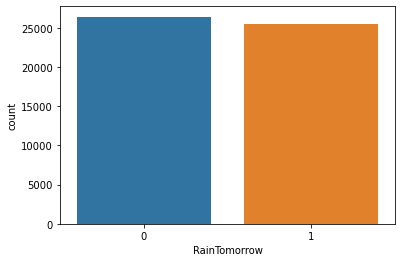

In [26]:
sns.countplot(x=df_train1['RainTomorrow'])

**Target Variable which we are predicting is almost balanced**

**3. Checking for Highly Co-related Columns**

Text(0.5, 1.0, 'Heatmap Correlation between the Input features')

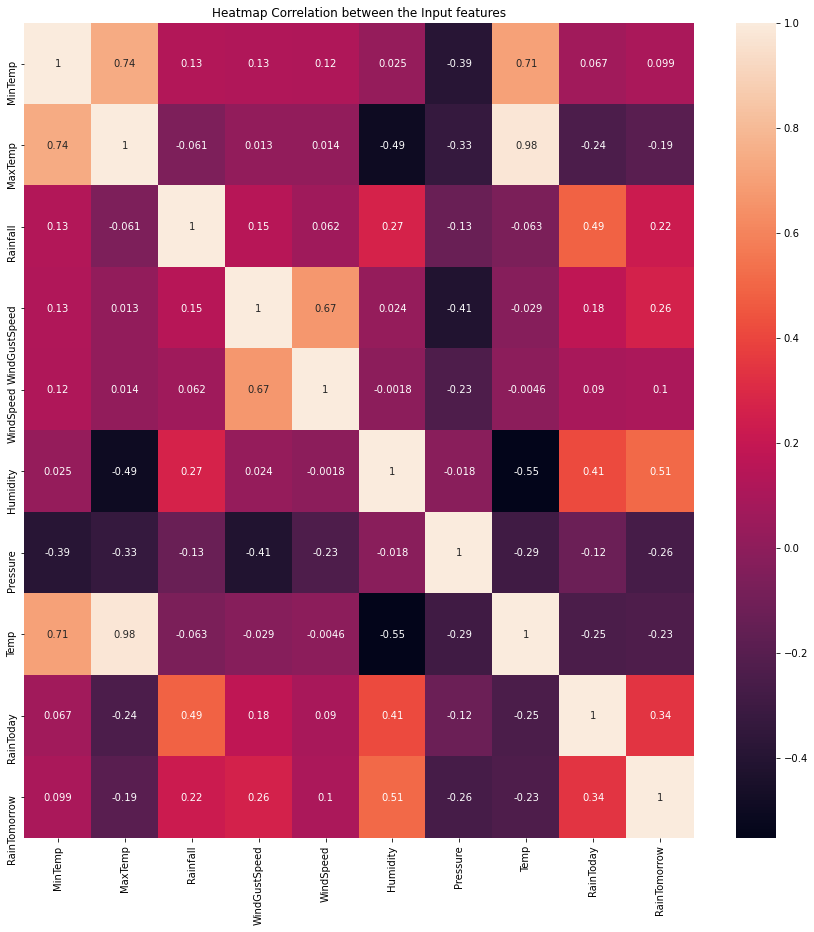

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train1.corr(), annot=True) # Correlation between the Columns to find the highly correlated columns to remove multi-collinearity
plt.title('Heatmap Correlation between the Input features')

MaxTemp and Temp have a very high correlation of 0.98 which shows that the 2 columns are almost idential and do not add any new information to the model being built. So, we can use Temp Column values to impute the missing values in the MaxTemp Column and later on drop the Temp Column as the same information is already present in the MaxTemp Column.

**4. Data Imputation**

**For imputing the data, we have different techniques to look at through which we can impute the missing data.** <br>
**1. Using the Median of the whole column as we may not have a value for a specific location to impute due to data quality issues pertaining to data collection issues** <br>
**2. Using the Median specific to the Location for missing value imputation i.e. what is the median value of Rainfall for a specific location as the range for Temperature, Rainfall etc. are very different for different locations** <br>
**3. Using the mode to impute categorical values** <br>
**4. Using the values of other columns to impute the missing values if they are co-related directly or using them to predict the missing values** <br>

In [28]:
# Checking the number of values for Temp which could be imputed for MaxTemp as they are highly co-related
df_train1['Temp'][df_train1['MaxTemp'].isnull()].value_counts().sum()

59

In [29]:
# Imputing the values of the Temp in MaxTemp where MaxTemp is null as they are almost the same

df_train1.loc[(pd.isnull(df_train1.MaxTemp)), 'MaxTemp'] = df_train1.Temp

In [30]:
df_train1.isnull().sum()

Location            0
MinTemp           266
MaxTemp            55
Rainfall          743
WindGustDir      3577
WindGustSpeed    3550
WindDir          1492
WindSpeed        1003
Humidity         1408
Pressure         5045
Temp             1042
RainToday         743
RainTomorrow        0
dtype: int64

In [31]:
# Function to impute median value for the whole column

def median_imputation(df,column):
    df[column].fillna(df[column].median(), inplace=True)

In [32]:
# Function to impute Local Median for a specific location for the input feature where there are missing values

def imputeLocMedian(df,column):
    df[column] = df.groupby(['Location'])[column].transform(lambda x: x.fillna(x.median()))

In [33]:
# Function to impute Mode value for Categorical features 

def mode_imputation(df,column):
    df[column].fillna(df[column].mode()[0], inplace=True)

MaxTemp and MinTemp are a little right-skewed so imputing Location Specific Median values would be a good choice for the missing values along with the fact that MaxTemp and MinTemp differ based on the location

In [34]:
# Imputing Location specific median at missing values in MaxTemp 

imputeLocMedian(df_train1,'MaxTemp')

In [35]:
# Imputing Location Specific Median at missing values in MinTemp

imputeLocMedian(df_train1,'MinTemp')


Dropping the Temp Column as there is no new information being added by this column as compared to MaxTemp

In [36]:
# Dropping the temperature column 

df_train1.drop(['Temp'],axis=1,inplace=True)

In [37]:
# Median Rainfall at specific locations

df_train1.groupby(['Location'])['Rainfall'].median()

Location
Adelaide            0.0
Albany              0.2
Albury              0.0
AliceSprings        0.0
BadgerysCreek       0.0
Ballarat            0.2
Bendigo             0.0
Brisbane            0.0
Cairns              0.4
Canberra            0.0
Cobar               0.0
CoffsHarbour        0.1
Dartmoor            0.4
Darwin              0.0
GoldCoast           0.0
Hobart              0.0
Katherine           0.0
Launceston          0.0
Melbourne           0.0
MelbourneAirport    0.0
Mildura             0.0
Moree               0.0
MountGambier        0.4
MountGinini         0.2
Newcastle           0.0
Nhil                0.0
NorahHead           0.2
NorfolkIsland       0.4
Nuriootpa           0.0
PearceRAAF          0.0
Penrith             0.0
Perth               0.0
PerthAirport        0.0
Portland            0.8
Richmond            0.0
Sale                0.0
SalmonGums          0.0
Sydney              0.0
SydneyAirport       0.0
Townsville          0.0
Tuggeranong         0.0
Uluru  

Rainfall column is highly right-skewed and the rainfall is different for different locations so imputing Location Median for the missing values in the Rainfall

In [38]:
# Imputing Local Median Specific to the Location for missing values of Rainfall

imputeLocMedian(df_train1,'Rainfall')

RainToday is the measure of Rainfall in mm on a given day. It is 1 if the rainfall is more than 1mm or 0 otherwise
All the locations have median Rainfall less than 1mm for the RainToday column to have 0 for missing values

In [39]:
# Imputing 0 for RainToday missing values

df_train1['RainToday'].fillna(0.0, inplace=True)

Wind Direction and Wind Gust Direction missing values were imputed by using WindDir and WindGustDir. So, for WindDir used WindGustDir values where it was missing and vice versa for WindGustDir as they make sense for the directions of Wind

In [40]:
# Imputing missing WindGustDir values using the corresponding WindDir Values

df_train1.loc[(pd.isnull(df_train1.WindGustDir)), 'WindGustDir'] = df_train1.WindDir

In [41]:
# Imputing missing WindDir values using the corresponding WindGustDir Values

df_train1.loc[(pd.isnull(df_train1.WindDir)), 'WindDir'] = df_train1.WindGustDir

Imputing mode for each WindDir and WindGustDir as they both have null values at the same location 

In [42]:
mode_imputation(df_train1,'WindGustDir')

In [43]:
mode_imputation(df_train1,'WindDir')

Humidity varies depending on the Location so imputing the Location Specific Median Humidity. Median is used as not to skew the distribution further which is slightly right-skewed.

In [44]:
# Imputing Location Specific Median to the missing values in the Humidity

imputeLocMedian(df_train1,'Humidity')

In [45]:
df_train1.groupby(['Location'])['Pressure'].median()

Location
Adelaide            1015.60
Albany              1015.20
Albury              1015.00
AliceSprings        1012.50
BadgerysCreek       1015.30
Ballarat            1014.70
Bendigo             1014.00
Brisbane            1015.00
Cairns              1010.80
Canberra            1014.50
Cobar               1014.20
CoffsHarbour        1015.90
Dartmoor            1014.50
Darwin              1007.40
GoldCoast           1015.40
Hobart              1011.30
Katherine           1006.85
Launceston          1012.30
Melbourne           1014.80
MelbourneAirport    1014.80
Mildura             1015.40
Moree               1014.00
MountGambier        1014.30
MountGinini             NaN
Newcastle               NaN
Nhil                1014.30
NorahHead           1016.30
NorfolkIsland       1015.10
Nuriootpa           1015.10
PearceRAAF          1014.20
Penrith                 NaN
Perth               1013.80
PerthAirport        1013.60
Portland            1015.10
Richmond            1015.70
Sale       

We can see for the pressure column we do not have median value for Pressure specific to the location for 4 Locations which are MountGinini, Newcastle, SalmonGuns and Penrith. So, imputing Location Specific Median for those locations where the Median value is present and for these 4 locations using the Median value of Pressure for the whole column to impute

In [46]:
# Imputing Location Specific Median for the missing values in the Pressure Column 

imputeLocMedian(df_train1,'Pressure')

In [48]:
# Imputing Median of Whole column for the remaining values in the Pressure Column having nulls

median_imputation(df_train1,'Pressure')

We see that for WindGustSpeed locations Albany and Newcastle do not have median value for WindGustSpeed so imputing Location Specific Median WindGustSpeed for all locations and for Albany and Newcastle imputing Median of whole column for Pressure.

In [49]:
df_train1.groupby(['Location'])['WindGustSpeed'].median()

Location
Adelaide            39.0
Albany               NaN
Albury              31.0
AliceSprings        39.0
BadgerysCreek       33.0
Ballarat            46.0
Bendigo             39.0
Brisbane            28.0
Cairns              37.0
Canberra            41.0
Cobar               35.0
CoffsHarbour        39.0
Dartmoor            41.0
Darwin              41.0
GoldCoast           43.0
Hobart              46.0
Katherine           39.0
Launceston          37.0
Melbourne           44.0
MelbourneAirport    48.0
Mildura             37.0
Moree               39.0
MountGambier        44.0
MountGinini         46.0
Newcastle            NaN
Nhil                43.0
NorahHead           44.0
NorfolkIsland       43.0
Nuriootpa           41.0
PearceRAAF          43.0
Penrith             30.0
Perth               35.0
PerthAirport        44.0
Portland            43.0
Richmond            33.0
Sale                41.0
SalmonGums          41.0
Sydney              41.0
SydneyAirport       50.0
Townsville      

In [50]:
# Imputing WindGustSpeed based on the Location Median

imputeLocMedian(df_train1,'WindGustSpeed')

In [51]:
# Imputing WindGustSpeed based on the whole column median value for WindGustSpeed

median_imputation(df_train1,'WindGustSpeed')

Imputing Location Specific Median WindSpeed for the WindSpeed missing values as the Wind Speed differs for different locations

In [52]:
# Imputing the WindSpeed based on the Location Specific Median value 

imputeLocMedian(df_train1,'WindSpeed')

In [53]:
df_train1.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir          0
WindSpeed        0
Humidity         0
Pressure         0
RainToday        0
RainTomorrow     0
dtype: int64

**Data is clean now without any missing values**

**5. Outlier Detection and Handling**

In [54]:
# Summary Statistics for the Clean data to check the distribution and any outliers in the input features

df_train1.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,RainToday,RainTomorrow
count,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000,51957.000000
mean,12.551163,22.509262,3.589409,41.934773,19.013357,57.540649,1014.259082,0.301923,0.491060
std,6.370599,7.110886,10.940538,14.127229,9.117724,21.627455,6.919643,0.459096,0.499925
min,-8.000000,-4.100000,0.000000,7.000000,0.000000,1.000000,977.100000,0.000000,0.000000
25%,8.000000,17.200000,0.000000,31.000000,13.000000,43.000000,1009.900000,0.000000,0.000000
50%,12.300000,21.800000,0.000000,41.000000,19.000000,58.000000,1014.200000,0.000000,0.000000
75%,17.200000,27.500000,2.000000,50.000000,24.000000,73.000000,1018.600000,1.000000,1.000000
max,31.400000,47.000000,371.000000,135.000000,83.000000,100.000000,1037.800000,1.000000,1.000000


In [55]:
# Checking the skewness of the data to check if there are extreme values in the data which are making the features skewed

df_train1.skew()

MinTemp          0.032832
MaxTemp          0.244956
Rainfall         8.127072
WindGustSpeed    0.860519
WindSpeed        0.646713
Humidity        -0.154393
Pressure        -0.056766
RainToday        0.862934
RainTomorrow     0.035767
dtype: float64

We can see that Rainfall Column is highly skewed as the skewness is greater than 1 and only a small percentage of points making the distribution highly right-skewed. I would plot the boxplot to check to the distribution of the Rainfall feature. 

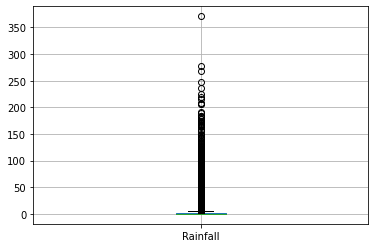

In [56]:
df_train1[['Rainfall']].boxplot()

In [57]:
IQR = df_train1.Rainfall.quantile(0.75) - df_train1.Rainfall.quantile(0.25)
Lower_fence = df_train1.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df_train1.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {Lower_fence} or > {Upper_fence}'.format(Lower_fence=Lower_fence, Upper_fence=Upper_fence))

Rainfall outliers are values < -6.0 or > 8.0


Form the boxplot we can see that Rainfall has extreme values and that the distribution is highly right skewed. Most of the values are between 0 to 10 and there are very few data points which are above the 75% percentile causing this high right skewness. We cannot directly remove all the points based on the IQR outlier approach to make the distribution almost symmetric as this would mean we are tampering the original data. There would be locations where Rainfall has these values of greater than 50 mm or so and if remove them or suppress them to a lower value to make the distribution symmetric we are changing the correct data to wrong data. So, I am removing any rainfall values greater than 250 to remove extreme values for the rainfall which are only 3 rows with Rainfall > 250 mm.

In [58]:
# Removing data points where Rainfall is greater than 250
df_train1 = df_train1[df_train1['Rainfall'] < 250]

WindGustSpeed boxplot shows that there are some number of points above the values of 75 percentile which is calculated below and the IQR approach is used to suppress/clip the maximum values of WindGustSpeed to the Upper Fence given by IQR.

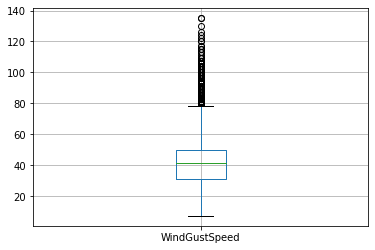

In [59]:
df_train1[['WindGustSpeed']].boxplot()

In [60]:
# IQR to find the range of values for Lower and Upper Fence which would be outliers for WindGustSpeed

IQR = df_train1.WindGustSpeed.quantile(0.75) - df_train1.WindGustSpeed.quantile(0.25)
Lower_fence = df_train1.WindGustSpeed.quantile(0.25) - (IQR * 3)
Upper_fence = df_train1.WindGustSpeed.quantile(0.75) + (IQR * 3)
print('WindGustSpeed outliers are values < {Lower_fence} or > {Upper_fence}'.format(Lower_fence=Lower_fence, Upper_fence=Upper_fence))

WindGustSpeed outliers are values < -26.0 or > 107.0


In [61]:
len(df_train1[df_train1['WindGustSpeed'] > 107])

21

In [62]:
# Function to suppress the maximum value to a value

def clip_max(df,col,max_val):
    df[col][df[col] > max_val] = max_val

In [63]:
# Suppressing the WindGustSpeed max value at 107 as derived from the IQR Upper Fence

clip_max(df_train1,'WindGustSpeed',107)

In [64]:
len(df_train1[df_train1['WindGustSpeed'] > 107])

0

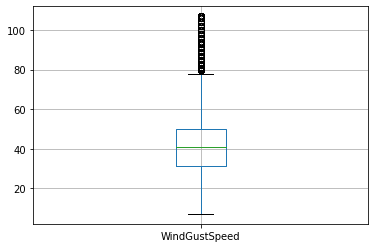

In [65]:
df_train1[['WindGustSpeed']].boxplot()

WindSpeed boxplot shows that there are data points above the values of 75 percentile which is calculated below and the IQR approach is used to suppress/clip the maximum values of WindSpeed to the Upper Fence given by IQR to not lose the other given data if we remove those rows of data completely.

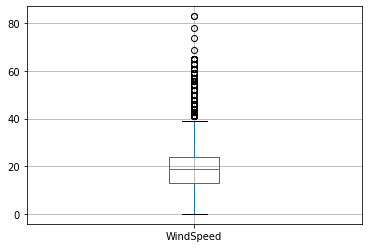

In [66]:
df_train1[['WindSpeed']].boxplot()

In [67]:
# IQR to find the range of values for Lower and Upper Fence which would be outliers for WindSpeed

IQR = df_train1.WindSpeed.quantile(0.75) - df_train1.WindSpeed.quantile(0.25)
Lower_fence = df_train1.WindSpeed.quantile(0.25) - (IQR * 3)
Upper_fence = df_train1.WindSpeed.quantile(0.75) + (IQR * 3)
print('WindSpeed outliers are values < {Lower_fence} or > {Upper_fence}'.format(Lower_fence=Lower_fence, Upper_fence=Upper_fence))

WindSpeed outliers are values < -20.0 or > 57.0


In [68]:
len(df_train1[df_train1['WindSpeed'] > 57])

41

In [69]:
# Suppressing the WindSpeed value to the max value of 57 as derived from the IQR Upper Fence

clip_max(df_train1,'WindSpeed',57)

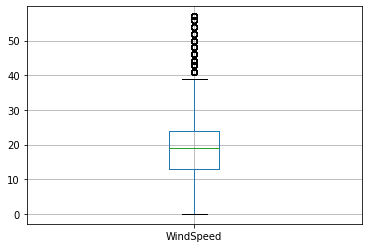

In [71]:
df_train1[['WindSpeed']].boxplot()

In [72]:
df_train1.skew()

MinTemp          0.032902
MaxTemp          0.245037
Rainfall         7.313481
WindGustSpeed    0.839970
WindSpeed        0.613453
Humidity        -0.154361
Pressure        -0.056745
RainToday        0.863142
RainTomorrow     0.035885
dtype: float64

The skewness of the data is not changed very much as compared to earlier. Rainfall values were not removed or clipped even though the IQR approach said so as we would want to have the real data for the Rainfall for the locations to be able to make better predictions. The number of data points with Rainfall > 8mm were good enough as per the real world data about the Rainfall to be ignored or changed to this values which could lead to data quality issues substituting large number of incorrect values. For WindGustSpeed and WindSpeed I used IQR approach I suppressed the outliers with the maximum value of the Upper Fence.

In [73]:
df_train1.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,RainToday,RainTomorrow
count,51954.000000,51954.000000,51954.000000,51954.000000,51954.000000,51954.000000,51954.000000,51954.000000,51954.000000
mean,12.550683,22.509014,3.571946,41.930169,19.008546,57.538909,1014.259236,0.301882,0.491031
std,6.370442,7.110985,10.691035,14.104390,9.093149,21.626794,6.919321,0.459079,0.499924
min,-8.000000,-4.100000,0.000000,7.000000,0.000000,1.000000,977.100000,0.000000,0.000000
25%,8.000000,17.200000,0.000000,31.000000,13.000000,43.000000,1009.900000,0.000000,0.000000
50%,12.300000,21.800000,0.000000,41.000000,19.000000,58.000000,1014.200000,0.000000,0.000000
75%,17.200000,27.500000,2.000000,50.000000,24.000000,73.000000,1018.600000,1.000000,1.000000
max,31.400000,47.000000,247.200000,107.000000,57.000000,100.000000,1037.800000,1.000000,1.000000


In [ ]:
# df_train1.to_csv('out_clean3_train1.csv')

# **Test Data**

In [74]:
df_test1 = df_test.copy()

In [75]:
# Dropping the columns with missing values close to 50%

df_test1.drop(['Evaporation','Sunshine','Cloud'],axis =1, inplace=True)

In [76]:
df_test1['RainToday'] = df_test1['RainToday'].replace({'No':0,'Yes':1}) # Encoding RainToday Column with 0 for No Rain and 1 for Rain Today

In [77]:
# Imputing the values of the Temp in MaxTemp where MaxTemp is null as they are almost the same

df_test1.loc[(pd.isnull(df_test1.MaxTemp)), 'MaxTemp'] = df_test1.Temp

In [78]:
# Imputing Location specific median at missing values in MaxTemp 

imputeLocMedian(df_test1,'MaxTemp')

In [79]:
# Imputing Location Specific Median at missing values in MinTemp

imputeLocMedian(df_test1,'MinTemp')

In [80]:
# Dropping the temperature column as MaxTemp and Temp are the same

df_test1.drop(['Temp'],axis=1,inplace=True)

In [81]:
# Rainfall at specific locations

df_test1.groupby(['Location'])['Rainfall'].median()

Location
Adelaide            0.0
Albany              0.2
Albury              0.0
AliceSprings        0.0
BadgerysCreek       0.0
Ballarat            0.0
Bendigo             0.0
Brisbane            0.0
Cairns              0.8
Canberra            0.0
Cobar               0.0
CoffsHarbour        0.0
Dartmoor            0.2
Darwin              0.0
GoldCoast           0.2
Hobart              0.0
Katherine           0.0
Launceston          0.0
Melbourne           0.0
MelbourneAirport    0.0
Mildura             0.0
Moree               0.0
MountGambier        0.2
MountGinini         0.2
Newcastle           0.0
Nhil                0.0
NorahHead           0.0
NorfolkIsland       0.4
Nuriootpa           0.0
PearceRAAF          0.0
Penrith             0.0
Perth               0.0
PerthAirport        0.0
Portland            0.6
Richmond            0.0
Sale                0.0
SalmonGums          0.0
Sydney              0.0
SydneyAirport       0.0
Townsville          0.0
Tuggeranong         0.0
Uluru  

In [82]:
# Imputing Local Median Specific to the Location for missing values of Rainfall

imputeLocMedian(df_test1,'Rainfall')

In [83]:
# All the locations have median Rainfall less than 1mm for the RainToday column to have 0 for missing values

df_test1['RainToday'].fillna(0.0, inplace=True)

In [84]:
# Imputing missing WindGustDir values using the corresponding WindDir Values

df_test1.loc[(pd.isnull(df_test1.WindGustDir)), 'WindGustDir'] = df_test1.WindDir

In [85]:
# Imputing missing WindDir values using the corresponding WindGustDir Values

df_test1.loc[(pd.isnull(df_test1.WindDir)), 'WindDir'] = df_test1.WindGustDir

In [86]:
# Imputing mode of the WindGustDir Column at the remaining missing values

mode_imputation(df_test1,'WindGustDir')

In [87]:
# Imputing mode of the WindDir Column at the remaining missing values

mode_imputation(df_test1,'WindDir')

In [88]:
# Imputing Location Specific Median to the missing values in the Humidity

imputeLocMedian(df_test1,'Humidity')

In [89]:
# Imputing Location Specific Median for the missing values in the Pressure Column 

imputeLocMedian(df_test1,'Pressure')


In [90]:
# Imputing Median of Whole column for the remaining values in the Pressure Column having nulls

median_imputation(df_test1,'Pressure')

In [91]:
# Imputing WindGustSpeed based on the Location Median

imputeLocMedian(df_test1,'WindGustSpeed')

In [92]:
# Imputing WindGustSpeed based on the whole column median value for WindGustSpeed

median_imputation(df_test1,'WindGustSpeed')

In [93]:
# Imputing the WindSpeed based on the Location Specific Median value 

imputeLocMedian(df_test1,'WindSpeed')

In [94]:
df_test1.isnull().sum()

ID               0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir          0
WindSpeed        0
Humidity         0
Pressure         0
RainToday        0
dtype: int64

**Training and Testing Data is now fully clean to be used for EDA and Model Building** 

In [ ]:
# df_test1.to_csv('out_test_clean1.csv')

# **EDA**

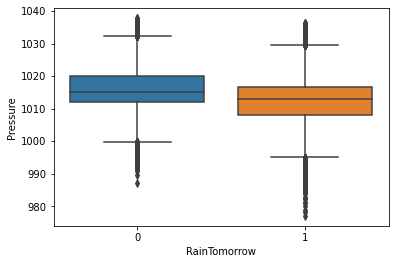

In [95]:
sns.boxplot(x = df_train1['RainTomorrow'], y = df_train1['Pressure'])

The Median of pressure when it rains tomorrow is lower than median of pressure when it does not rain tomorrow. The Median of pressure when it rains tomorrow is almost equal to Q1 of Pressure when it doesn't rain tomorrow.

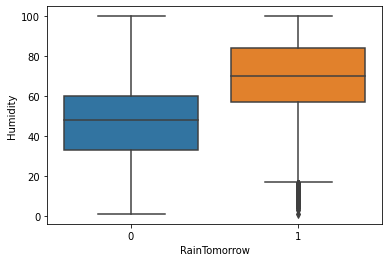

In [96]:
sns.boxplot(x = df_train1['RainTomorrow'], y = df_train1['Humidity'])

The Median of the Humidity is higher by a good amount for when it rains tomorrow than when it doesn't rain. So, we can say that when it rains tomorrow the Median humidity is on the higher side. The Q3 of humidity of no rain tomorrow is almost equal to Q1 of humidity when it rains tomorrow. 

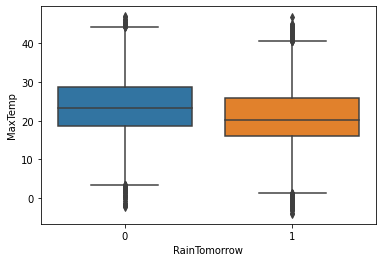

In [97]:
sns.boxplot(x = df_train1['RainTomorrow'], y = df_train1['MaxTemp'])

When it does not rain tomorrow the Median of MaxTemp is higher for no rain tomorrow than with rain tomorrow. 

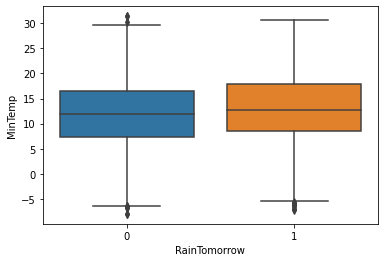

In [98]:
sns.boxplot(x = df_train1['RainTomorrow'], y = df_train1['MinTemp'])

When it does not rain the Median Value of MinTemp is lower as compared to the when it rains tomorrow. There is a very slight difference in the Median, Q1 and Q3 values for Rain Tomorrow than for No Rain Tomorrow. All these 3 values are slightly higher for Rain Tomorrow.

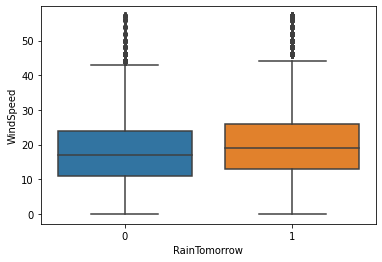

In [99]:
sns.boxplot(x = df_train1['RainTomorrow'], y = df_train1['WindSpeed'])

The Median Wind Speed is higher when it rains tomorrow than when it doesn't.

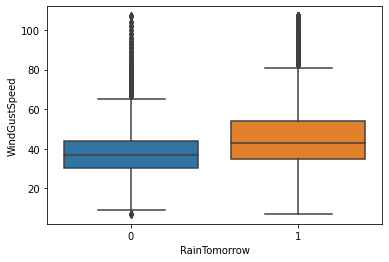

In [100]:
sns.boxplot(x = df_train1['RainTomorrow'], y = df_train1['WindGustSpeed'])

The Median Wind Gust Speed is on the higher side when it rains tomorrow. The Median of Wind Gust Speed is almost equal to Q1 of Wind Gust Speed when no rain happens tomorrow i.e. the median is on the higher side for Gust Speed when it rains tomorrow.

# **Data Preparation for Decision Tree**

**For the Decision Trees, it would require all the inputs to be in the numerical form. But we have Location, WindGustDir and WindDir as the categorical which need to be converted to Numerical before being feed to the Decision Tree. So, creating the dummies for these categorical values to be feed as input to the Decision Tree to work on both Categorical and Numerical Input Features.** <br>

In [101]:
df_train2 = df_train1.copy()

In [102]:
df_test2 = df_test1.copy()

In [103]:
df_train3 = df_train1.copy()

In [104]:
df_test3 = df_test1.copy()

In [105]:
# Function to create dummies for the categorical variables dropping the original input variable 

def dummies(df,column):  
    return pd.get_dummies(df[column],prefix=column).join(df).drop([column],axis=1)

In [106]:
# Dummy creation for Location Feature for Train Data

df_train_du = dummies(df_train3,'Location')

In [107]:
# Dummy creation for WindDir Feature for Train Data

df_train_du = dummies(df_train_du,'WindDir')

In [108]:
# Dummy creation for WindGustDir Feature for Train Data

df_train_du = dummies(df_train_du,'WindGustDir')

In [109]:
# Final Data to be feed to the Decision Tree for Modeling to predict Rain Tomorrow

df_train_du.head()

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,Location_Woomera,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,RainToday,RainTomorrow
0,0,0,0,0,0,0,0,0,0,0,...,0,18.9,23.7,0.0,41.0,28.0,55.0,1026.0,0.0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,11.1,20.8,0.0,39.0,26.0,48.0,1014.4,0.0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,15.9,19.5,17.6,44.0,9.0,99.0,1028.5,1.0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0.0,14.9,0.0,35.0,19.0,55.0,1023.0,0.0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,9.1,22.7,0.0,41.0,7.0,40.0,1027.1,0.0,0


In [110]:
# Dummy creation for Location Feature for Test Data

df_test_du = dummies(df_test3,'Location')

In [111]:
# Dummy creation for WindDir Feature for Test Data

df_test_du = dummies(df_test_du,'WindDir')

In [112]:
# Dummy creation for WindGustDir Feature for Test Data

df_test_du = dummies(df_test_du,'WindGustDir')

In [113]:
# Final Data which would be used to get predictions from the model about Rain Tomorrow

df_test_du.head()

,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,...,Location_Woomera,ID,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,RainToday
0,0,0,0,0,0,0,0,1,0,0,...,0,1,15.3,21.5,4.4,70.0,22.0,69.0,997.6,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,7.1,11.0,38.8,48.0,19.0,46.0,1014.0,1.0
2,0,0,0,0,0,0,0,1,0,0,...,0,3,3.6,16.6,0.2,37.0,15.0,48.0,1016.6,0.0
3,0,0,0,0,0,0,1,0,0,0,...,1,4,17.6,37.4,0.0,37.0,19.0,11.0,1010.4,0.0
4,0,0,1,0,0,0,0,0,0,0,...,0,5,11.4,25.6,0.0,31.0,13.0,52.0,1016.4,0.0


# **Decision Tree Implementation and Modeling Process**

**1. For Decision Tree, converted all categorical attributes to numerical using dummies as it cannot work with Categorical Attributes.** <br>
**2. Splitting the Data into 80:20 Ratio for Train and Validation Data using the Hold-Out Method to evaluate the performance of the model and see if it is overfitting or underfitting on the validation data along with Hyper parameters tuning** <br>
**3. GridSearch CV used to tune all the hyper parameters of choice with the range of values specified using the 10 fold Cross Validation to build a more generalized model with unbiased predictions and having low variance** <br>
**4. Metric Used for model performance evaluation is Recall. We want the Recall to be as higher as possible. Recall is the percent of positive cases predicted correctly. For our case, we want to reduce the False Negatives to the lowest possible value which is predicting No Rain when actually it rains tomorrow. The Algorithm should predict with high accuracy the days when it will rain so that someone won't have to get wet in the rain if it is predicted as No Rain when actually it would rain. False Positives are not of huge concern but False nagetives are. So, Recall is used as the metric to evaluate the performance of the model.** <br>


In [114]:
# Input and Output features defined for the Decision Tree

X = df_train_du.drop(['RainTomorrow'],axis=1)
y = df_train_du['RainTomorrow']

In [115]:
# Splitting the Training Data into 80:20 Train and Validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [116]:
# Decision Tree Classifier

dtree = DecisionTreeClassifier()

In [117]:
# Fitting the Train Data using the Decision Tree

dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [118]:
# Predictin on the 20% validation data using the Trained Decision Tree Model

dtree_prediction = dtree.predict(X_test)

In [119]:
# Confusion Matrix and Classification Report 

print(confusion_matrix(y_test,dtree_prediction))
print(classification_report(y_test,dtree_prediction))

[[3713 1468]
 [1526 3684]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      5181
           1       0.72      0.71      0.71      5210

    accuracy                           0.71     10391
   macro avg       0.71      0.71      0.71     10391
weighted avg       0.71      0.71      0.71     10391



**Decision Tree Hyper Parameters Tuning and building Tuned Model**

**Hyper parameters which are tuned for the Decision Tree are:** <br>
**1. Criterion: This hyper parameter can have 2 values "Gini" or "Entropy". This is the criteria used to split the node using either of the 2 options.** <br>
**2. Min_Samples_split: The minimum number of samples/instances required to split a node of the decision tree. This parameter ensures that we satisfy the condition of minimum number of instances before splitting a node.** <br>
**3. Max_depth: This parameter specifies how deep the Decision Tree can be be to its maximum depth. The more deeper is the tree, the more number of splits it takes capturing more information about the data.** <br>
**4. Min_Samples_leaf: It is the minimum number of samples required by the node to be considered as the leaf node. This is the minimum number of samples required on both the left and right branches for the node to be considered as the leaf node after the split. This parameter may have the effect of smoothing the model.** <br>
**5. Max_leaf_nodes: Maximum number of the leaf nodes in total at the end of the tree**

In [123]:
# Defining the Grid with values for each of the hyper parameters to tune the Decision Tree Model

param_grid = {'criterion':['gini','entropy'],
              'min_samples_split':[25,100,200],
              'max_depth': [5, 20, 30],
              'min_samples_leaf': [1,3, 5, 10],
              'max_leaf_nodes': [5, 10, 20,40]}

In [124]:
# Using the GridSearchCV with Cross Validation of 10 folds and metric used being Recall to hyper tune the parameters

dtree_grid = GridSearchCV(dtree, param_grid, cv=10,scoring='recall')

In [125]:
# Fit the Train Data using the Grid Search to build the best model 

dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 20, 30],
                         'max_leaf_nodes': [5, 10, 20, 40],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'min_samples_split': [25, 100, 200]},
             scoring='recall')

In [126]:
# Best Model Hyper Parameters for the Decision Tree

for hps, values in dtree_grid.best_params_.items():
    print(f"{hps}: {values}")

criterion: gini
max_depth: 20
max_leaf_nodes: 20
min_samples_leaf: 1
min_samples_split: 25


In [127]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, dtree_grid.predict(X_test))*100)}%")

Accuracy: 75.0%


In [128]:
# Creating the New Tree with the best model hyper parameters to be used for creating Decision Tree Visualization

dtree_tuned = DecisionTreeClassifier(criterion='gini',max_depth=20,max_leaf_nodes=20,min_samples_leaf=1,min_samples_split=25)

In [129]:
# Fitting the Above created Decision Tree with Training Data

dtree_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=20, min_samples_split=25)

In [130]:
# Training Data Classification Report showing the Recall to be 0.74

print(classification_report(dtree_grid.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76     19832
           1       0.79      0.74      0.76     21731

    accuracy                           0.76     41563
   macro avg       0.76      0.76      0.76     41563
weighted avg       0.76      0.76      0.76     41563



In [131]:
# Validation Data Classification Report showing the Recall of 0.74

print(classification_report(dtree_grid.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      4905
           1       0.78      0.74      0.76      5486

    accuracy                           0.75     10391
   macro avg       0.75      0.75      0.75     10391
weighted avg       0.75      0.75      0.75     10391



**From the above results, we can see that the model is not overfitting or underfitting and it is performing equally well on both the datasets. On the Validation set, we have 74% Recall which means the model is able to predict the Rain tomorrow accurately when actually it rains given the data. Overfitting would have been a problem if our model would have performed very well on the train data and performs poorly on the test data but in this case we have Recall and Accuracy almost the same for both the training and validation set which implies our model is not overfitting.**

In [132]:
# AUC score for the Best Hyper Parameter Tuned Model

print('AUC score for the best dtree tuned model is',roc_auc_score(y_test, dtree_grid.predict_proba(X_test)[:,1]))

AUC score for the best dtree tuned model is 0.829624743591026


**AUC Score is used to distinguish between the False Positives and False Negatives. The AUC score of this best model is 0.83 which means it is able to distinguish 82.96% of the time between when it rains and when it doesn't. No model is perfect to give the area under the curve to be 100% or 1 meaning that there is no overlap between the classes and there is no misclassification suggesting model is perfectly able to classify all the instances to the classes correctly i.e. predict rain tomorrow always correctly and perfect distinguishing between FP and FN as they would be 0. Score of 0.5 suggests the model is randomly predicting the rain tomorrow.**

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.830


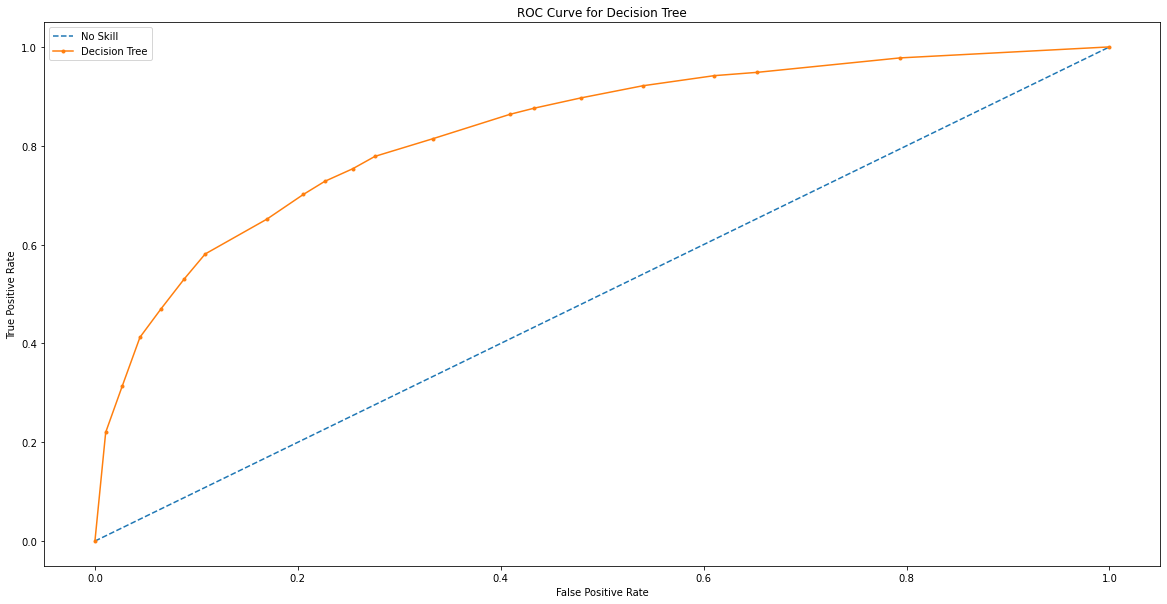

In [134]:
# Plotting the ROC Curve

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities required for ROC Curve not classification
lr_probs = dtree_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate AUC ROC scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(20,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
# show the legend
plt.legend()
# show the plot
plt.show()

**Decision Tree Feature Importance showing Humidity is the Most Important Feature for predicting the Rain Tomorrow accurately. Only WindGustSpeed, Pressure and Rainfall are the other features which contribute to the Model Prediction.**

In [135]:
dtree_fea_imp = pd.DataFrame({'Features':X_train.columns,'Feature_Importance':dtree_tuned.feature_importances_})

In [136]:
dtree_fea_imp.sort_values(by='Feature_Importance',ascending=False)

,Features,Feature_Importance
86,Humidity,0.775920
84,WindGustSpeed,0.116442
87,Pressure,0.074372
83,Rainfall,0.033266
0,WindGustDir_E,0.000000
...,...,...
28,WindDir_SW,0.000000
27,WindDir_SSW,0.000000
26,WindDir_SSE,0.000000
25,WindDir_SE,0.000000


**Decision Tree Visualization for the Base and the Hyper Tuned Model**

For the Base Model, Decision Tree Visualization is not clear as there are soo many conditions taken into account to make the splits and the decision. It is not feasible to look at this decision tree to interpret how the decision tree is making its decision based on what condition.

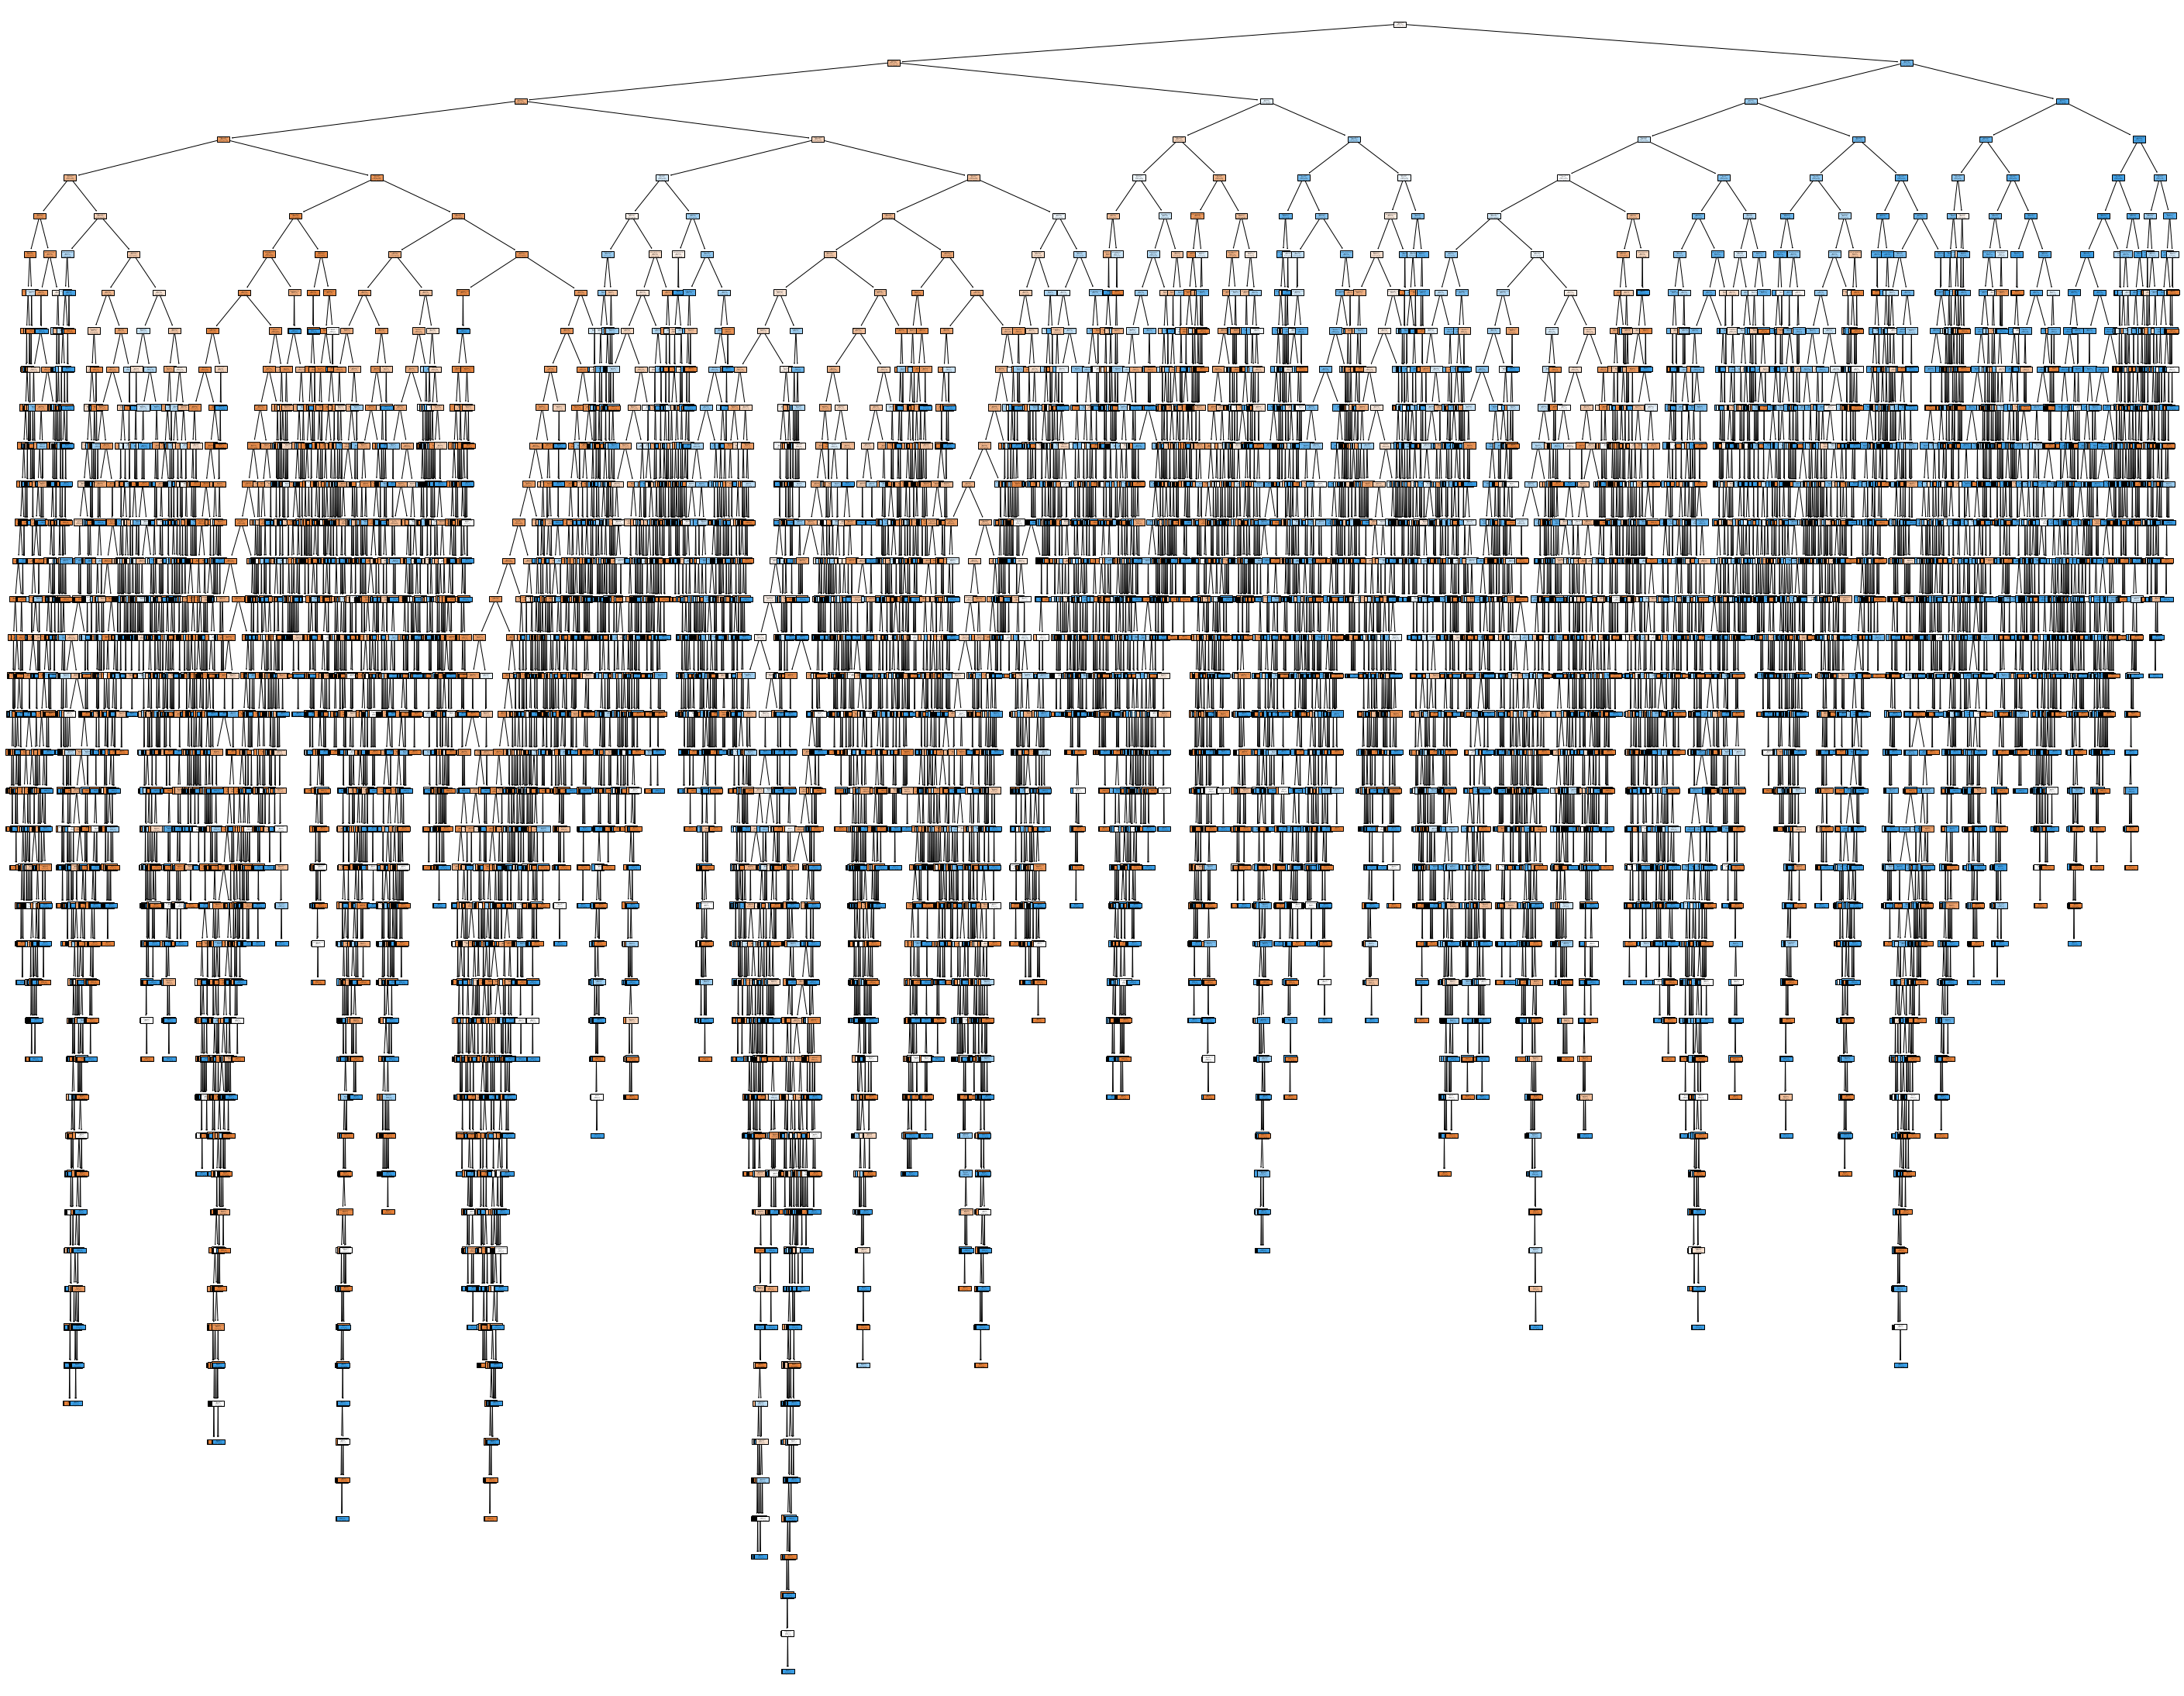

In [137]:
# Plotting the Decision Tree Visualization for the Base Model to show how the Decision Tree makes the prediction for Rain Tomorrow

from sklearn import tree
plt.figure(figsize = (50,40))
tree.plot_tree(dtree,filled = True,feature_names=X.columns,class_names=['Rain_Tomorrow = No','Rain_Tomorrow = Yes'])
plt.show()

**- For the Hyper parameter tuned model, we can see that it is easy to see how the decision tree is making the decision and splitting the tree nodes.** <br>
**- At the top, we see that Humidity feature is used to make decision of Raining Tomorrow. It is the most important feature to be considered by Decision Tree to make the accurate prediction. It is the feature which is most informative in deciding if it Rains tomorrow or not. This can be seen in the feature importance calculated earlier stating Humidity is the most important feature helping the decision tree to make the predictions.** <br>
**- If the Humidity is less than or equal to 64.5, the gini value is 0.5 meaning that there is a equal distribution of instances between the 2 classes at the Root Node. If this Humidity condition is satisfied, then it wont rain tomorrow as it is shown on the left side of the Root Node. If the value is Humidity is greater than or equal to 64.5, the decision is it Rains Tomorrow. This root node would be again split to check few more conditions as per the hyper parameters specified like min_samples_leaf, max_depth to give the least amount of gini value to make our decision concrete about the instances belonging to that class** <br> **- Gini Index value should be as less as possible as our preference as 0 means all the instances belong to 1 class for sure and 1 means the nature is random for class membership. Then the subsequent nodes are split based on the condition and the gini value.** <br>
**- For No Rain Tomorrow, the decsion tree is split again on the value of WindGustSpeed to decide if it would rain tomorrow or not. 
For Rain tomorrow, again Humidity is checked to make the decision if it Rains tomorrow or not.** <br>
**- This whole splitting would run till the leaves are pure i.e. no more splitting the tree and we have accounted for all the combinations to give us the best generalized and unbiased performance** <br>

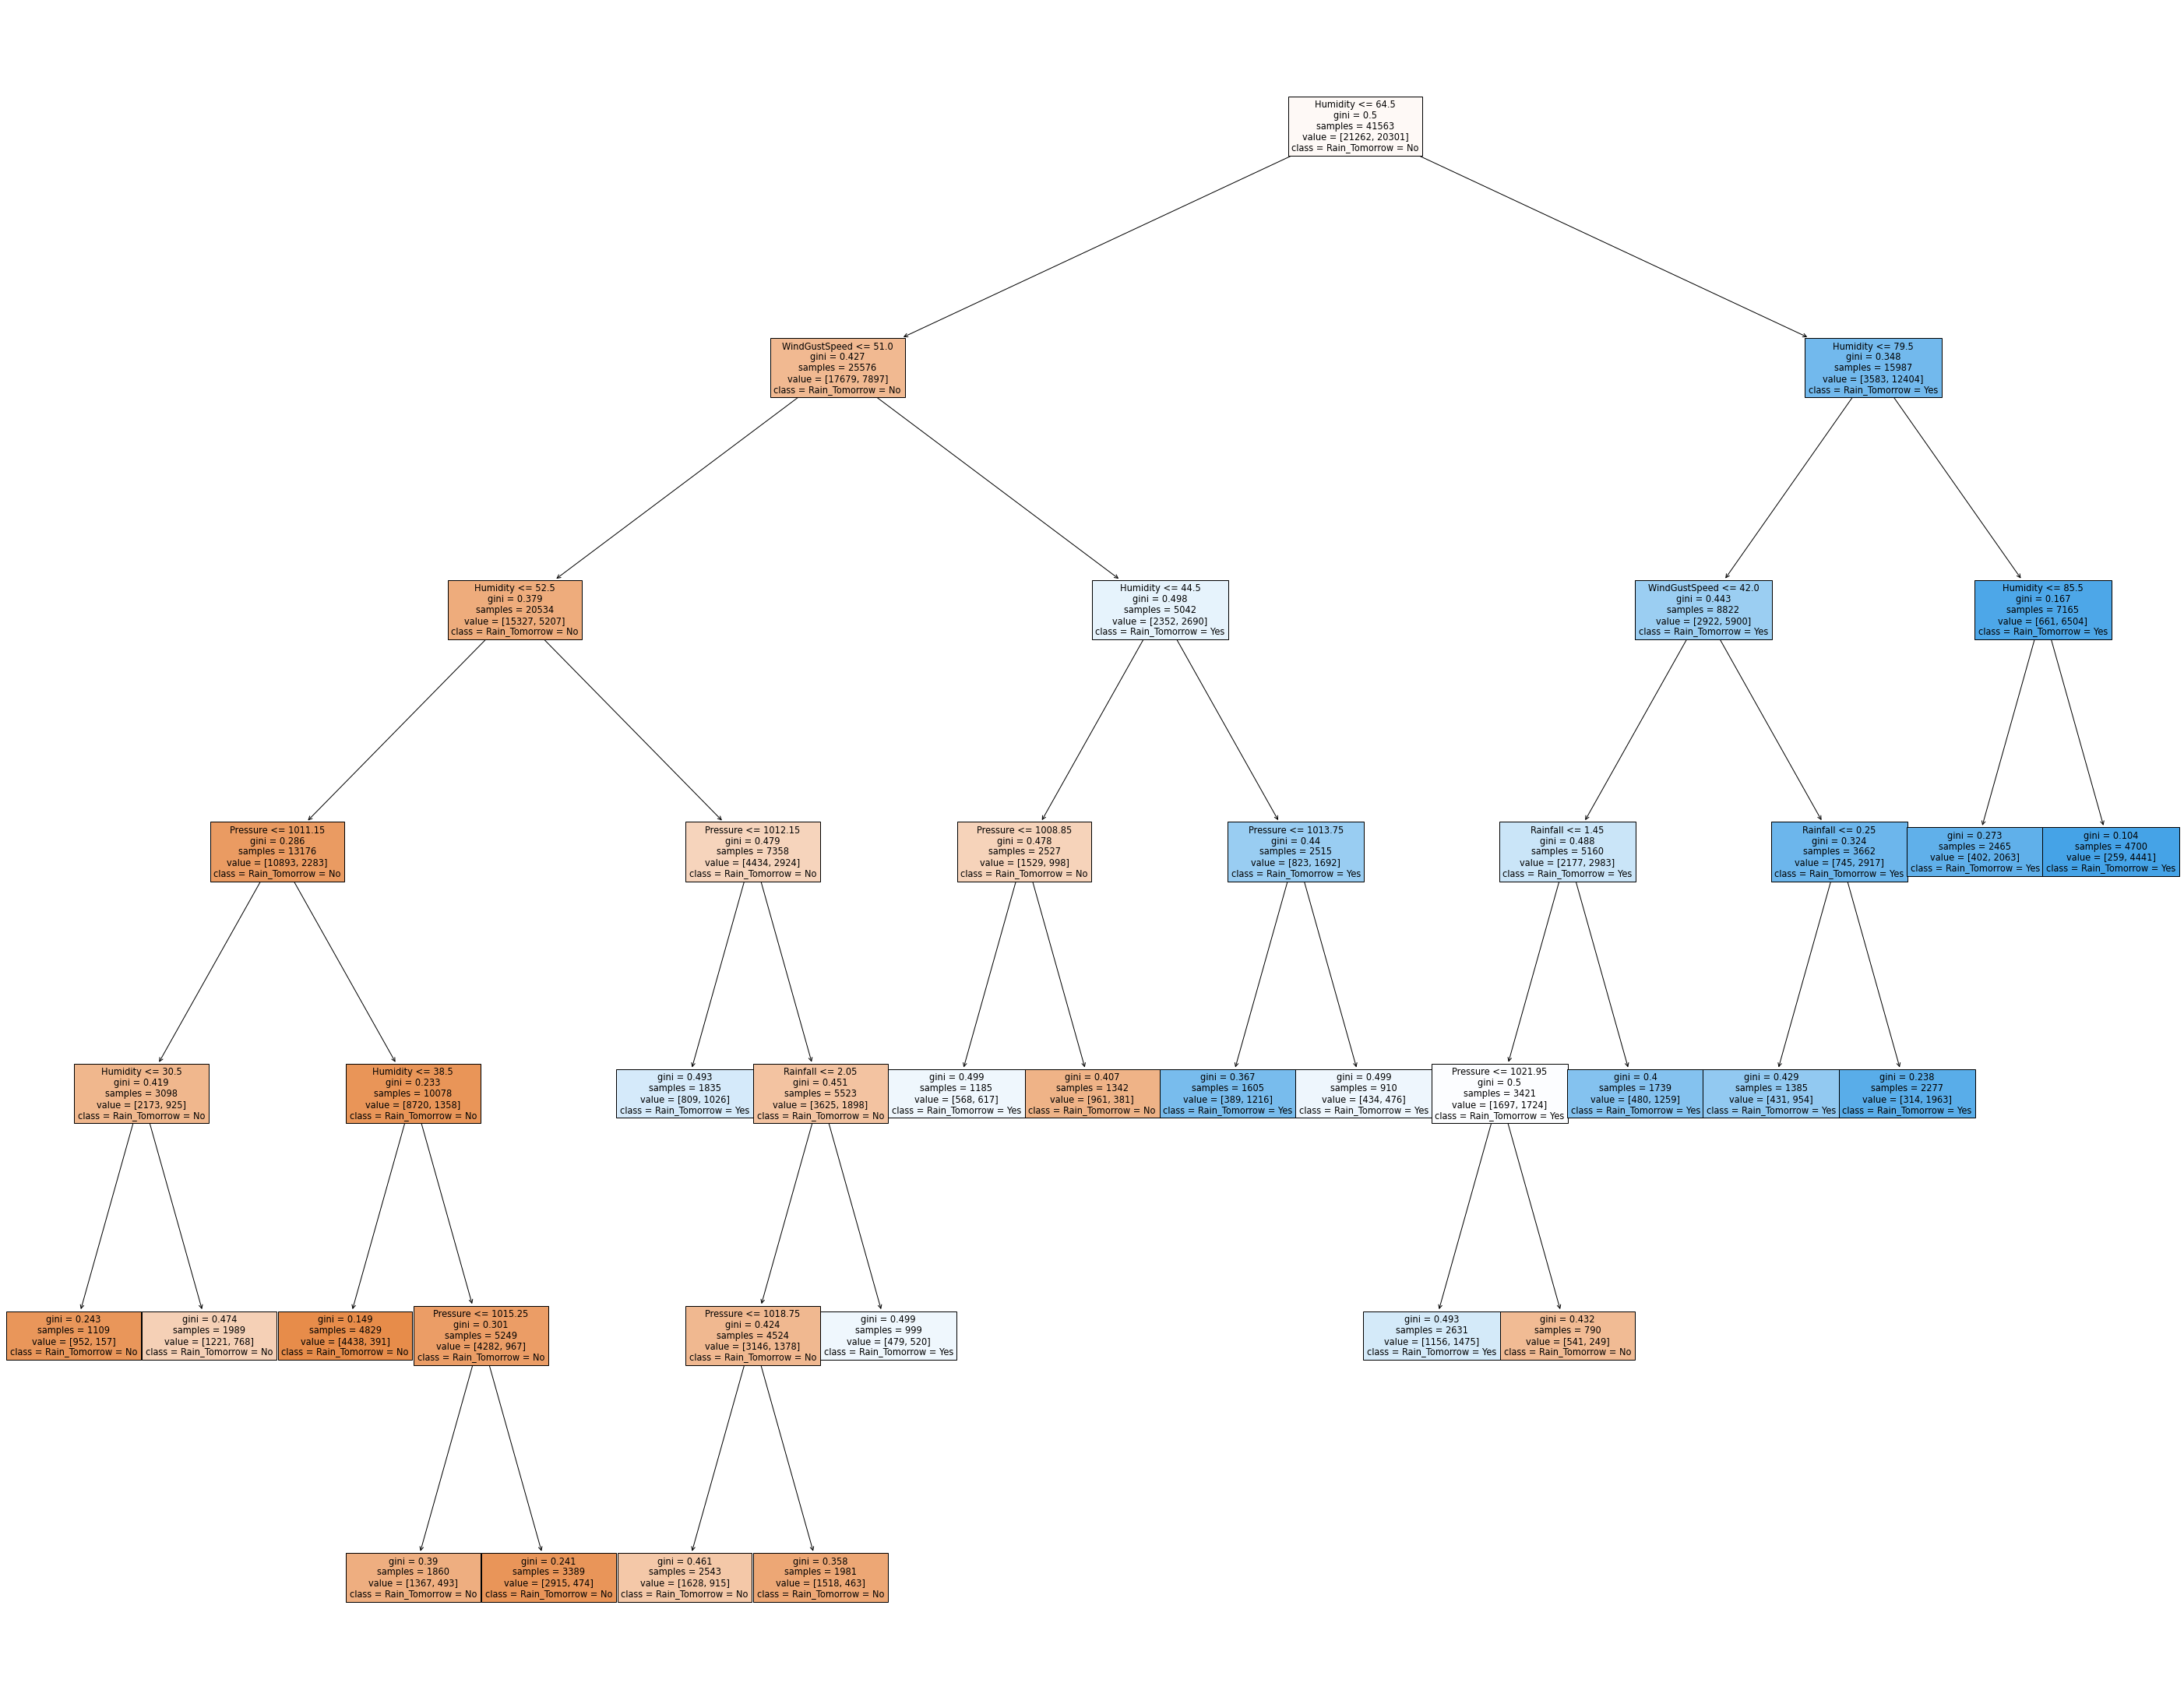

In [138]:
# Plotting the Decision Tree Visualization for the Hyper Tuned Model to show how the Decision Tree makes the prediction for Rain Tomorrow

from sklearn import tree
plt.figure(figsize = (50,40))
tree.plot_tree(dtree_tuned,filled = True,feature_names=X.columns,class_names=['Rain_Tomorrow = No','Rain_Tomorrow = Yes'])
plt.show()

**Decision Tree Prediction for the Testing Data**

In [139]:
dtree_tuned_pred = dtree_grid.predict(df_test_du[df_test_du.columns[df_test_du.columns!="ID"]])

In [140]:
dtree_tuned_pred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

# Data Pre Processing for Clustering

In [141]:
# Removing the categorical columns from the train data

df_train2.drop(['Location','WindGustDir','WindDir','RainToday'],axis=1,inplace=True)

In [142]:
# Removing the categorical columns from the test data

df_test2.drop(['Location','WindGustDir','WindDir','RainToday'],axis=1,inplace=True)

**Normalizing/Scaling the Data for the Clustering as distances are calculated so we want to make all the attributes on the same scale for the algorithm to be not biased to one input feature or the other**

In [143]:
# MinMax Scaling for the Train Data to make all the input features on same scale

min_max_scaler = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(df_train2)


In [144]:
# MinMax Scaling for the Test Data to make all the input features on same scale

test_scaled = min_max_scaler.fit_transform(df_test2)

In [145]:
# Creating the Normalized Train Data

df_normalized = pd.DataFrame(train_scaled, columns=df_train2.columns, index=df_train2.index)
df_normalized.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure,RainTomorrow
count,51954.000000,51954.000000,51954.000000,51954.000000,51954.000000,51954.000000,51954.000000,51954.000000
mean,0.521591,0.520724,0.014450,0.349302,0.333483,0.571100,0.612179,0.491031
std,0.161686,0.139158,0.043249,0.141044,0.159529,0.218452,0.113992,0.499924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.406091,0.416830,0.000000,0.240000,0.228070,0.424242,0.540362,0.000000
50%,0.515228,0.506849,0.000000,0.340000,0.333333,0.575758,0.611203,0.000000
75%,0.639594,0.618395,0.008091,0.430000,0.421053,0.727273,0.683690,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
# Creating the Normalized Test Data

df_normalized_test = pd.DataFrame(test_scaled, columns=df_test2.columns, index=df_test2.index)
df_normalized_test.describe()

,ID,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure
count,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000,12994.000000
mean,0.500000,0.524857,0.517584,0.009810,0.273134,0.218021,0.568729,0.596153
std,0.288708,0.176266,0.140260,0.029841,0.111084,0.105596,0.218756,0.121557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400552,0.415020,0.000000,0.187500,0.149425,0.416667,0.521053
50%,0.500000,0.516575,0.501976,0.000000,0.265625,0.218391,0.575758,0.594737
75%,0.750000,0.651934,0.614625,0.005985,0.335938,0.275862,0.727273,0.671930
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
# Unscaling the ID column of the Normalized Test Data by replacing it with Original Data

df_normalized_test['ID'] = df_test2['ID']

In [148]:
df_normalized_test.head()

,ID,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed,Humidity,Pressure
0,1,0.602210,0.498024,0.011970,0.492188,0.252874,0.686869,0.305263
1,2,0.375691,0.290514,0.105550,0.320312,0.218391,0.454545,0.592982
2,3,0.279006,0.401186,0.000544,0.234375,0.172414,0.474747,0.638596
3,4,0.665746,0.812253,0.000000,0.234375,0.218391,0.101010,0.529825
4,5,0.494475,0.579051,0.000000,0.187500,0.149425,0.515152,0.635088


# **Kmeans Clustering**

**Repurpose the unsupervised learning algorithms like clustering for classification: For Unsupervised Learning, we do not have class labels. But in this case we have the class labels with us and this is a binary problem with 2 classes RainTomorrow = Yes and RainTomorrow = No. So, we would run the Unsupervised algorithm with 2 clusters one each for the 2 classes. In this way, we are repurposing the unsupervised algorithms to behave as supervised algorithms for classification with ground truth known to us. These labels would help in tuning the hyper parameters better making the algorithm to learn better and classify the data into 2 clusters much accurately than before**.  

**Modeling Process for Kmeans:** <br>
**1. Dropped the categorical variables as creating dummies as we created for Decision Tree would not help and cause the model to have dense clusters round these values of 0 and 1 as the algorithm is distance based and these numbers would effect the density of the clusters to which the points are to be classified as being the members of that cluster.** <br>
**2. Split the dataset into 80:20 ratio as Training and Validation Data for evaluating the model performance on validation test and tune the hyper parameters to see if the model is overfitting or not.** <br>
**3. Elbow method to determine the optimum number of clusters to define for Kmeans as it requires us to specify the number of clusters at the very start. This method shows that after a certain value of K (number of clusters), the error doesn't reduce much and is almost the same. The point at which this happens after which there is hardly any change in the Error is taken as the value for the number of the clusters. In our case, we can skip this as we already know that we have to create 2 clusters one each for RainTomorrow=Yes and RainTomorrow=No based on the dataset. This value can be determined through the domian knowledge as in this case without the Elbow method**. <br>
**4. Data is scaled using the MinMax Scaler already to be used for the input to make all the input features on the same scale.** <br>
**5. Hyper Parameters are tuned to build a more robust model which is unbiased and generalized. These hyper parameters tuning would give us the best model to use it for making accurate predictions or assigning the unseen data to one of these 2 clusters.** <br>
**6. Recall is the metric used to evaluate the model performance as we are more concerned about reducing the False Negatives which is percent of times Rain Tomorrow is true and our model predicts it correctly.**

In [149]:
# Defining the Input and the Output Features for Kmeans

X = df_normalized.drop(['RainTomorrow'],axis=1)
y = df_normalized['RainTomorrow']

In [150]:
# Splitting the Training data into 80:20 ratio for Model Building as Train and Validation Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

**Elbow Method to determine the Number of Clusters in Advance for the Kmeans Clustering**

**We see that after k=2, the distortions decrease gradually so we can chose this value for the number of clusters based on Elbow Method which is not necessary as we already know we have to create 2 clusters.**

In [151]:
# Changing the Number of clusters from 1 to 10 to see how the error is changing to select optimum number of clusters

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    distortions.append(kmeanModel.inertia_)

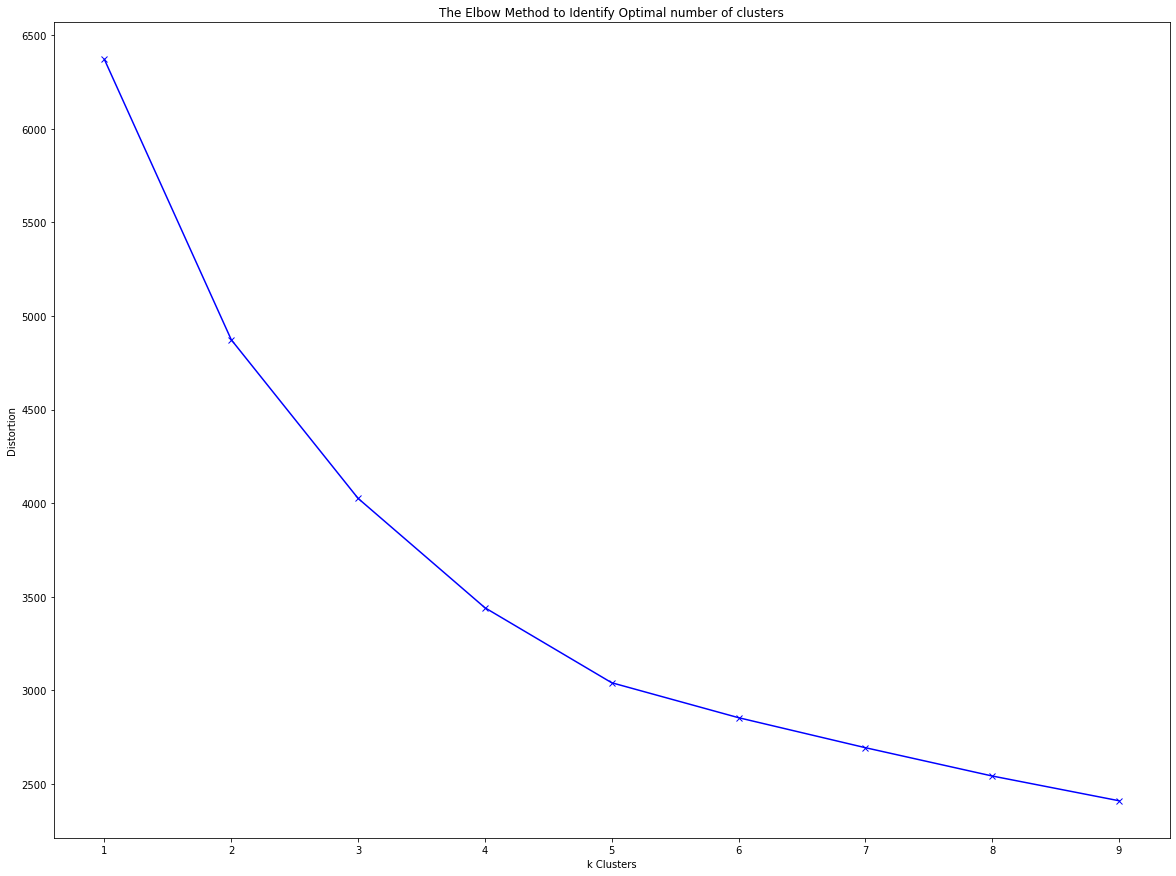

In [152]:
# Graph of Distortions vs Number of Clusters

plt.figure(figsize=(20,15))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method to Identify Optimal number of clusters')
plt.show()

**Kmeans Hyper Parameters Tuning**

**Hyper parameters tuned for Kmeans are:** <br>
**1. max_iter: The maximum number of iterations to run the Kmeans model after which there is no change in the position of the cluster centroids and they are finalized to have more close-nit inter-clusters and far intra-clusters.** <br>
**2. n_inint: The number of times the Kmeans algorithm will run with different centroids seeds.** <br>

In [153]:
# Grid to define the Hyper Parameters along with their range of values to be used for creating multiple models

param_grid_kmeans = {'max_iter':[50,100,200],
              'n_init':[10,25,50]}

In [154]:
# Kmeans Classifier with 2 clusters

kmeans = KMeans(n_clusters=2,random_state=6)

In [155]:
# GridSearcCV for tuning the hyper parameters to get the best model with 10 fold CV and metric used is Recall

kmeans_grid = GridSearchCV(kmeans,param_grid_kmeans,cv=10,scoring='recall')

In [156]:
# Fitting the Train Data 

kmeans_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KMeans(n_clusters=2, random_state=6),
             param_grid={'max_iter': [50, 100, 200], 'n_init': [10, 25, 50]},
             scoring='recall')

In [157]:
# Best Model hyper parameters for Kmeans

kmeans_grid.best_params_

{'max_iter': 50, 'n_init': 10}

In [158]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, kmeans_grid.predict(X_test))*100)}%")

Accuracy: 66.0%


In [159]:
# Classification Report for Kmeans Tuned Model for the Train Data

print(classification_report(kmeans_grid.predict(X_train),y_train))

              precision    recall  f1-score   support

           0       0.59      0.71      0.65     17685
           1       0.75      0.64      0.69     23878

    accuracy                           0.67     41563
   macro avg       0.67      0.67      0.67     41563
weighted avg       0.68      0.67      0.67     41563



In [160]:
# Classification Report for Kmeans Tuned Model for the Test Data

print(classification_report(kmeans_grid.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64      4413
           1       0.74      0.64      0.69      5978

    accuracy                           0.66     10391
   macro avg       0.66      0.67      0.66     10391
weighted avg       0.67      0.66      0.67     10391



**Kmeans algorithm is not overfitting or underfitting being used for a Classification problem rather than for Clustering due to the fact that Recall of 0.64 is the same for train and validation set meaning that the model performs equally well on both the train and validation and does not memeorise the train data points to perform poorly on the validation data.**

**Kmeans Tuned Model for Predicting the Test Data with no labels for the ground truth**

In [161]:
kmeans_tuned_pred = kmeans_grid.predict(df_normalized_test[df_normalized_test.columns[df_normalized_test.columns!="ID"]])

In [162]:
kmeans_tuned_pred

array([1, 1, 1, ..., 0, 1, 1])

# **HAC**

**Modeling Process for HAC:** <br>

**1. Categorical Variables are dropped and only the numerical attributes are considered for the model building. These categorical attributes if given using the One-hot encoding would cause dense clusters to be formed around these 2 values effecting the clusters.** <br>
**2. Scaling the dataset using MinMax Scaler to get all the input features on the same scale.** <br>
**3. There is no predict option for HAC we are training the model based on the whole training dataset.** <br>
**4. Recall is the metric used as discussed earlier to minimize the False Negatives**. <br>


In [163]:
# Input and Output Features Defined for the HAC Model

X = df_normalized.drop(['RainTomorrow'],axis=1)
y = df_normalized['RainTomorrow']

**Agglomerative Approach is a bottom-up approach where each data point is considered as a cluster at the start and then algorithm merges them until only 1 single cluster is formed.** <br>
**For HAC, the linkage parameter determines the criteria we would use to determine which distance would be used between the data points to merge these data points/clusters to minimize this criteria of the linkage. Here, ward is used as the linkage criteria which minimizes the variance of the clusters while merging the clusters together. Reducing the variance of each cluster is achieved by using ward as the linkage.** <br>
**If the linkage is ward, only affinity which is acceptable is Euclidean. Affinity is the metric used to compute the linkage.**

In [164]:
# HAC model with 2 clusters and linkage used is ward

hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [165]:
# Fitting the Entire Train Data using the HAC

hac.fit(X)

AgglomerativeClustering()

In [166]:
print(f"Accuracy: {round(metrics.accuracy_score(y, hac.labels_)*100)}%")

Accuracy: 56.0%


In [167]:
# Classification Report for the HAC for the whole data

print(classification_report(hac.labels_,y))

              precision    recall  f1-score   support

           0       0.65      0.56      0.60     30374
           1       0.48      0.57      0.52     21580

    accuracy                           0.56     51954
   macro avg       0.56      0.56      0.56     51954
weighted avg       0.58      0.56      0.57     51954



**1. Dendogram is a diagram showing the hierarchical relationship between objects. This dendogram can also be used to determine the number of clusters and how to allocate the different objects to different clusters.** <br>
**2. We see the maximum vertical distance before the horizontal line to determine the number of clusters using the Dendogram. <br>
Also, depending on the distance we can have different number of clusters.** <br>
**3. The height at which the objects are joined together gives the similarity of these objects. The objects which same height joined together are most similar than other objects joined at different heights.** <br>

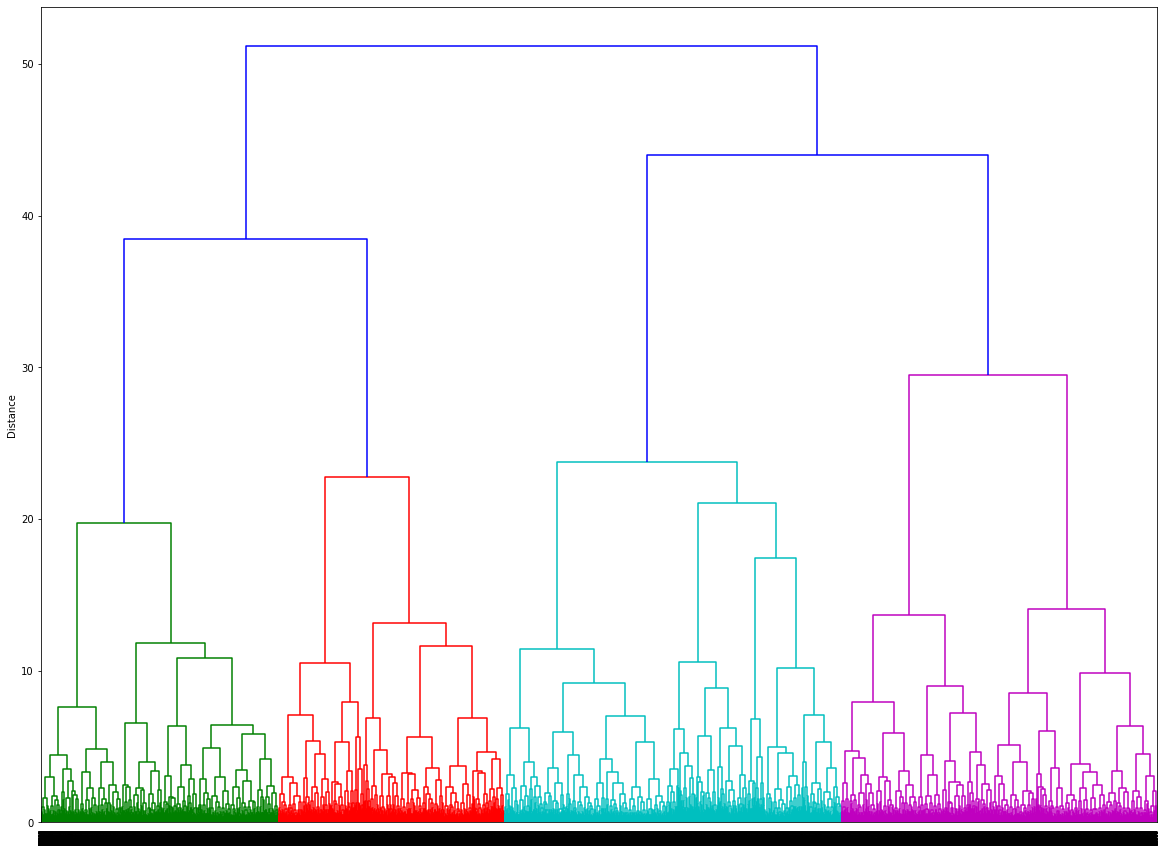

In [168]:
# Dendogram plot using the linkage method as ward to show the Data clusters are formed

plt.figure(figsize=(20,15))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.ylabel('Distance')
plt.show()

In [169]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [170]:
# setting distance_threshold=0 ensures we compute the full tree.
model_hac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [171]:
model_hac.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

**1.We have kept the distance threshold at 45 to get the 2 clusters before hitting the 1st horizontal line giving the maximum vertical distance.** <br>
**2. The first point in green joined together with x axis labels 1819 and 1953 are most similar to each other as the height is the same used for joining these 2 form a big cluster. These clusters which are most similar to each other are combined to form a single cluster at the end which the top as shown. In HAC, we don't need to provide the number of clusters initially as the data points which are the most similar are joined together to form a single cluster at the end and we can determine the number of clusters using the Dendogram or our domain knowledge.** <br> 

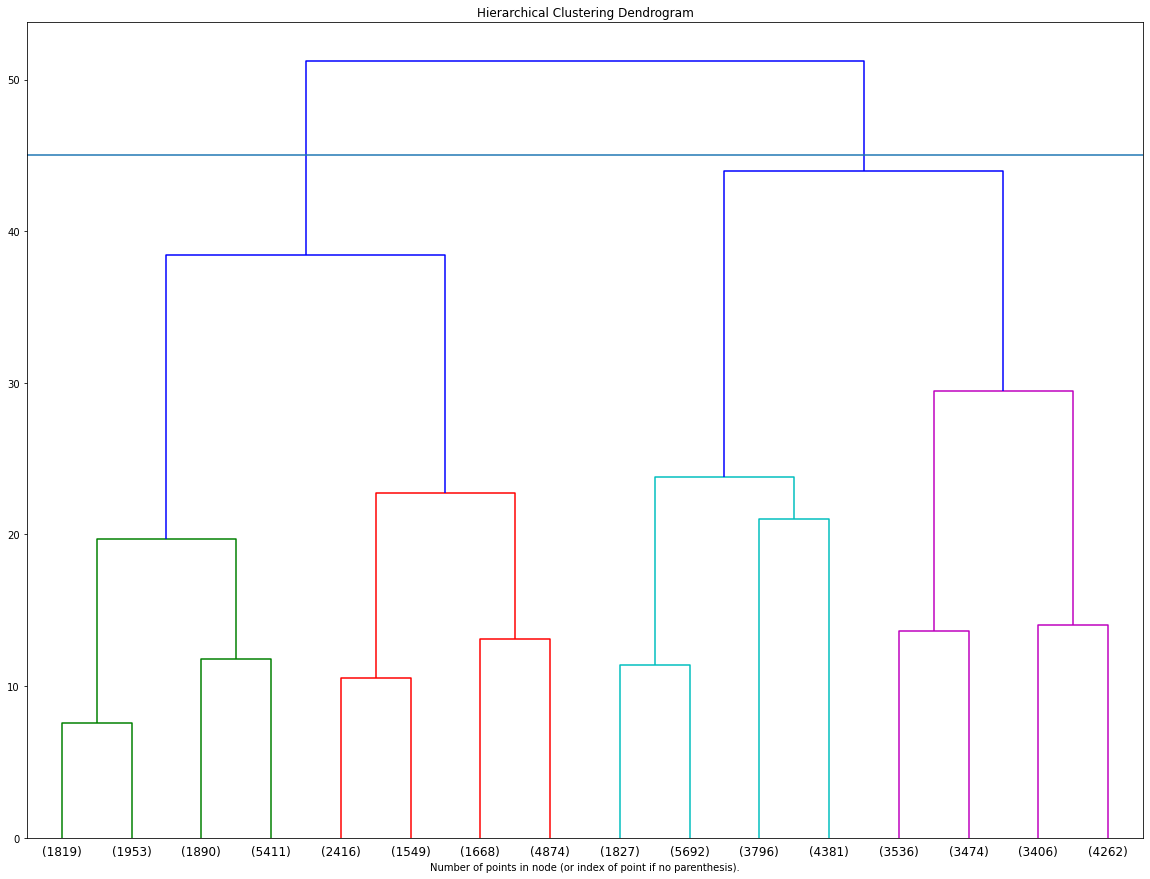

In [172]:
plt.figure(figsize=(20,15))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model_hac, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(y=45)
plt.show()

**HAC for Test Data Prediction**

In [173]:
# Fitting the Test Data without labels 

hac_test = hac.fit(df_normalized_test)

In [174]:
# HAC Algorithm predicted labels for the test data

hac_pred = hac_test.labels_

**Summary Data with Best Performing Models along with Best Recall Scores**

In [175]:
# Summary DataFrame with Models, Best Recall Score and Hyper paameters

summary_df = pd.DataFrame({'Algorithms':['Decision_Tree','Kmeans','HAC'],'Best_Recall_Score':[0.75,0.64,0.56],'Hyperparameters_Best_Model':[dtree_grid.best_params_,kmeans_grid.best_params_,"linkage='ward'"]})

In [176]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-176-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [177]:
summary_df

,Algorithms,Best_Recall_Score,Hyperparameters_Best_Model
0,Decision_Tree,0.75,"{'criterion': 'gini', 'max_depth': 20, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 25}"
1,Kmeans,0.64,"{'max_iter': 50, 'n_init': 10}"
2,HAC,0.56,linkage='ward'


**From the above output, we can see that Decision Tree is the best performing model from the 3 models with Recall of 0.75 for the best tuned model. As this is a Supervised learning problem, this result is quite obivious as Clustering algorithms are not meant for classification rather they are meant for creating the clusters to classify the data into groups and not predict one class or the other which is the case for classification.**

**Final Prediction for the Test Data for all the 3 Algorithms**

In [178]:
df_test_final = pd.DataFrame({'ID':df_normalized_test['ID'],'kmeans':kmeans_tuned_pred,'HAC':hac_pred,'DT':dtree_tuned_pred})

In [179]:
df_test_final

,ID,kmeans,HAC,DT
0,1,1,0,1
1,2,1,0,0
2,3,1,0,0
3,4,0,0,0
4,5,0,0,0
...,...,...,...,...
12989,12990,0,1,0
12990,12991,0,1,0
12991,12992,0,1,1
12992,12993,1,1,0


In [180]:
df_test_final.to_csv('testing_rainyes_predictions.csv',index=False)